In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
course_df = pd.read_csv("data/OEDI Course Overview Data.csv")
majmin_df = pd.read_csv("data/OEDI Student Major-Minor Data.csv")

In [75]:
print(course_df["Instruction Mode Desc"].value_counts())


Instruction Mode Desc
In Person                       167023
Online Asynchronous               6583
Hybrid                            3485
Online Synchronous                2969
Research Rate                     2204
Hybrid with Remote Option          119
In Person with Remote Option        41
Name: count, dtype: int64


In [76]:
print(course_df.groupby("Class Academic Group Desc")["Instruction Mode Desc"].value_counts())

Class Academic Group Desc       Instruction Mode Desc       
Batten Leadership & Public Pol  In Person                        3916
College & Graduate Arts & Sci   In Person                       98921
                                Online Asynchronous               885
                                Research Rate                     786
                                Online Synchronous                559
Continuing & Prof Studies       Online Asynchronous               985
                                Online Synchronous                747
                                Hybrid                             92
                                In Person                          55
Darden Grad School of Business  In Person                        7595
                                Hybrid                           2241
                                Online Asynchronous               739
                                Online Synchronous                 19
Engineering & Applied Science

In [77]:
pd.crosstab(course_df["Instruction Mode"], course_df["Instruction Mode Desc"])


Instruction Mode Desc,Hybrid,Hybrid with Remote Option,In Person,In Person with Remote Option,Online Asynchronous,Online Synchronous,Research Rate
Instruction Mode,,,,,,,
HR,0,119,0,0,0,0,0
HY,3485,0,0,0,0,0,0
OA,0,0,0,0,6583,0,0
OS,0,0,0,0,0,2969,0
P,0,0,167023,0,0,0,0
PR,0,0,0,41,0,0,0
RR,0,0,0,0,0,0,2204


In [78]:
course_df.groupby("Class Campus Desc")["Instruction Mode Desc"].value_counts()


Class Campus Desc           Instruction Mode Desc       
International Study Campus  In Person                          460
Main Campus                 In Person                       166235
                            Research Rate                     2187
                            Online Asynchronous               2167
                            Online Synchronous                1215
                            Hybrid                             688
                            Hybrid with Remote Option          119
                            In Person with Remote Option        41
Off-Grounds                 Hybrid                            2687
                            Online Asynchronous                601
                            In Person                          255
                            Online Synchronous                  19
                            Research Rate                       17
Online                      Online Asynchronous               2942
     

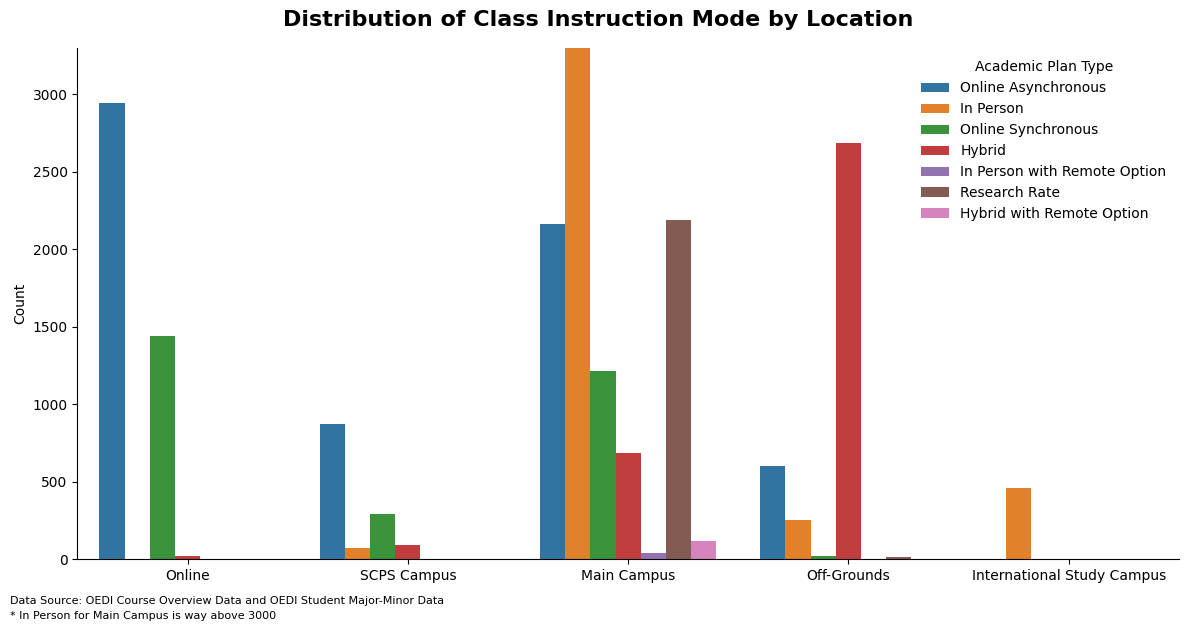

In [79]:
# Create a plot that displays the distribution of academic plan types by campus
plt.figure(figsize=(12, 6))

sns.countplot(data=course_df, x="Class Campus Desc", hue="Instruction Mode Desc")

plt.suptitle("Distribution of Class Instruction Mode by Location", fontweight="bold", fontsize=16)
plt.xlabel("")
plt.ylim(0, 3300)
plt.ylabel("Count")

plt.legend(title="Academic Plan Type", frameon=False, loc="upper right")
plt.figtext(0.01,-0.01, "Data Source: OEDI Course Overview Data and OEDI Student Major-Minor Data", fontsize=8, ha="left")
plt.figtext(0.01,-0.035, "* In Person for Main Campus is way above 3000", fontsize=8, ha="left")

sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

In [80]:
course_df.groupby("Course ID")["Instruction Mode Desc"].nunique().value_counts()


Instruction Mode Desc
1    2746
2      89
3       2
Name: count, dtype: int64

In [81]:
multi_mode = course_df.groupby("Course ID")["Instruction Mode Desc"].nunique()

#Course IDs with more than 1 unique instruction mode
conflicting_ids = multi_mode[multi_mode > 1].index

# All rows for courses with more than 1 unique instruction mode
conflicting_df = course_df[course_df["Course ID"].isin(conflicting_ids)]

# Check which modalities each course uses
modalities_summary = conflicting_df.groupby("Course ID")["Instruction Mode Desc"].unique()

# Display the results
print("Total courses with conflicting modalities:", len(conflicting_ids))
print("\nModalities per conflicting course:\n", modalities_summary)


Total courses with conflicting modalities: 91

Modalities per conflicting course:
 Course ID
14825                 [Hybrid, In Person]
14828                 [Hybrid, In Person]
14859    [Online Asynchronous, In Person]
14931                 [Hybrid, In Person]
15103                 [In Person, Hybrid]
                       ...               
9383     [Online Asynchronous, In Person]
9427     [Online Asynchronous, In Person]
9436     [Online Asynchronous, In Person]
9565     [Online Asynchronous, In Person]
9824           [Research Rate, In Person]
Name: Instruction Mode Desc, Length: 91, dtype: object


In [82]:
# Check what schools these 91 courses belong to
conflicting_schools = conflicting_df.groupby("Class Academic Group Desc")["Course ID"].nunique()
# Display the number of courses with conflicting modalities by school
print("Courses with multiple modalities by school: \n", conflicting_schools)


Courses with multiple modalities by school: 
 Class Academic Group Desc
College & Graduate Arts & Sci      8
Continuing & Prof Studies          2
Darden Grad School of Business    13
Engineering & Applied Science     41
Executive VP & Provost             1
McIntire School of Commerce        2
Medical School - BIMS/PHS          3
School of Data Science             1
School of Education & HumanDev    12
School of Nursing                  8
Name: Course ID, dtype: int64


In [83]:
# Group conflicting courses by their modality combinations
modality_combos = (conflicting_df.groupby("Course ID")["Instruction Mode Desc"].agg(set).reset_index(name="Modality Combination"))

# Count how often each combination occurs
combo_counts = modality_combos["Modality Combination"].value_counts()

print("Modality combinations in courses:\n")
print(combo_counts)


Modality combinations in courses:

Modality Combination
{In Person, Online Asynchronous}                        52
{Hybrid, In Person}                                     22
{In Person, Online Synchronous}                         10
{Hybrid, Online Synchronous}                             2
{In Person, Research Rate}                               2
{Hybrid, In Person, Online Synchronous}                  1
{In Person, Online Asynchronous, Online Synchronous}     1
{Online Asynchronous, Online Synchronous}                1
Name: count, dtype: int64


In [84]:
#Aggregate modalities as sets per course per school
modality_combos_by_school = (conflicting_df.groupby(["Class Academic Group Desc", "Course ID"])["Instruction Mode Desc"].agg(set).reset_index(name="Modality Combination"))

#Convert the sets to tuples so they are hashable
modality_combos_by_school["Modality Combination"] = modality_combos_by_school["Modality Combination"].apply(tuple)

#Count how often each modality combo appears per school
combo_counts_by_school = (modality_combos_by_school.groupby(["Class Academic Group Desc", "Modality Combination"]).size().unstack(fill_value=0))

#Display result
print(combo_counts_by_school)


Modality Combination            (Hybrid, In Person)  \
Class Academic Group Desc                             
College & Graduate Arts & Sci                     0   
Continuing & Prof Studies                         0   
Darden Grad School of Business                   12   
Engineering & Applied Science                     0   
Executive VP & Provost                            0   
McIntire School of Commerce                       0   
Medical School - BIMS/PHS                         1   
School of Data Science                            0   
School of Education & HumanDev                    1   
School of Nursing                                 8   

Modality Combination            (Hybrid, In Person, Online Synchronous)  \
Class Academic Group Desc                                                 
College & Graduate Arts & Sci                                         0   
Continuing & Prof Studies                                             0   
Darden Grad School of Business         

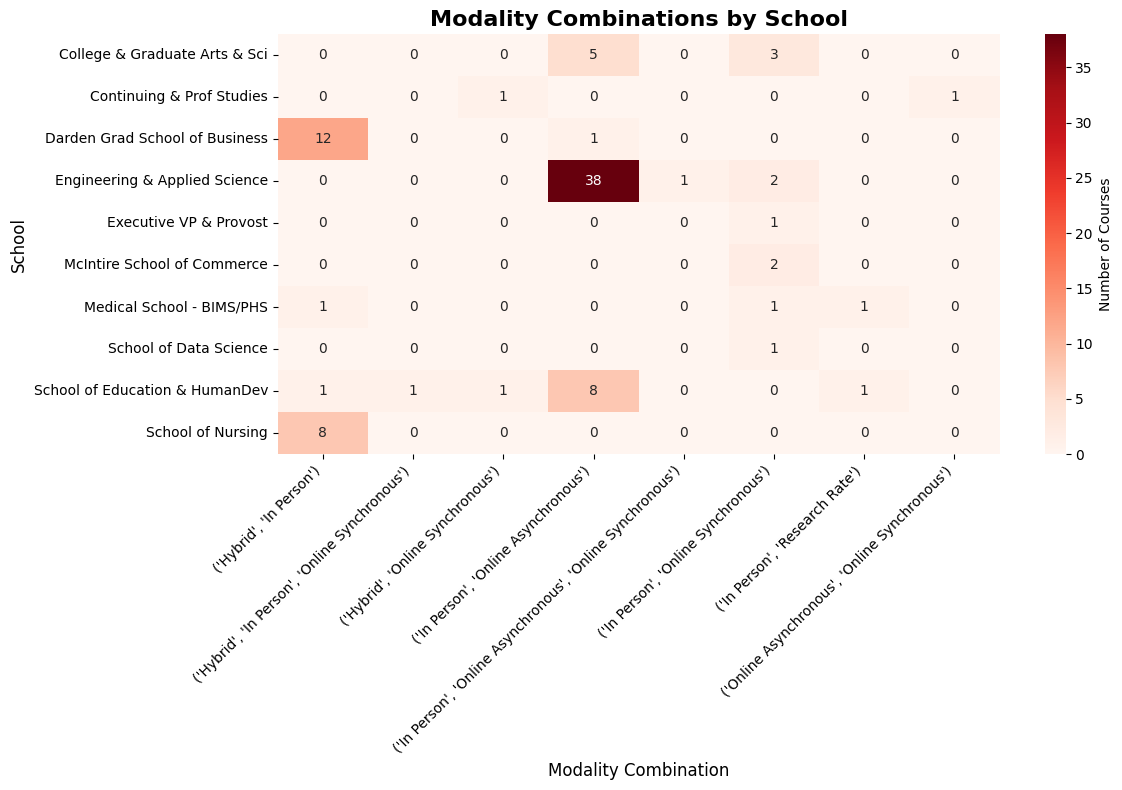

In [85]:
# Plot the modality combinations by school
plt.figure(figsize=(12, 8))
sns.heatmap(combo_counts_by_school, annot=True, cmap="Reds", cbar_kws={"label": "Number of Courses"})
plt.title("Modality Combinations by School", fontsize=16, fontweight="bold")
plt.xlabel("Modality Combination", fontsize=12)
plt.ylabel("School", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()